In [297]:
from sklearn.metrics import roc_auc_score
import numpy as np

label = np.array(
    [
        [0,0,1,0],
        [1,0,0,1],
        [0,0,1,0],
        [1,0,0,0],
        [0,1,0,0]
    ]
)

pred = np.array(
    [
        [0.1,0.1,0.7,0.2],
        [0.4,0.1,1,0.9],
        [0.1,0.1,0.8,0.15],
        [0.6,0,0,0.9],
        [0.1,0.4,0.05,0.2]
    ]
)

roc_auc_score(label,pred)+roc_auc_score(label,1-pred)

1.0

In [2]:
import torch
logits = torch.randn((4,16))
label = torch.ones((4,16))

In [8]:
start,end = 0,4
this_logits = torch.max(logits[start:end], dim=0, keepdim=True).values
this_y = torch.max(label[0], dim=0, keepdim=True).values

In [30]:
import pandas as pd
pesudo_df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_label.csv')

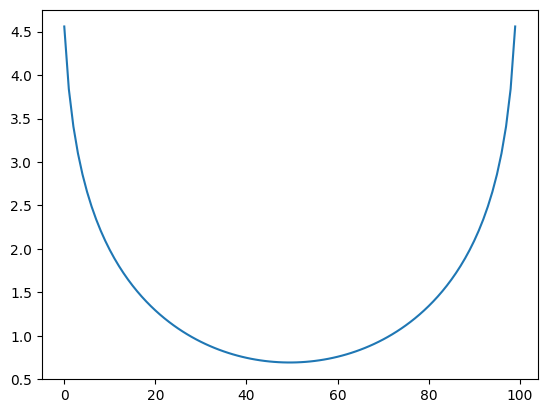

In [37]:
import matplotlib.pyplot as plt
pred = np.linspace(0.01,0.99,100)
plt.plot(-(1-pred)*np.log(pred) - pred*np.log(1-pred))

In [45]:
bird_cols = list(pesudo_df.columns[1:])
entropy_dict = dict(zip(bird_cols,[[] for _ in range(len(bird_cols))]))
pred_dict = dict(zip(bird_cols,[[] for _ in range(len(bird_cols))]))
for col in bird_cols:
    pred = pesudo_df[col]
    entropy = -(1-pred)*np.log(pred) - pred*np.log(1-pred)
    entropy_dict[col].append(entropy)
    pred_dict[col].append(pred)

(array([20976.,  6584.,  1028.,   208.,    85.,    60.,    47.,    66.,
           70.,    54.]),
 array([0.02554989, 0.1019097 , 0.17826951, 0.25462932, 0.33098913,
        0.40734893, 0.48370874, 0.56006855, 0.63642836, 0.71278817,
        0.78914797]),
 <BarContainer object of 10 artists>)

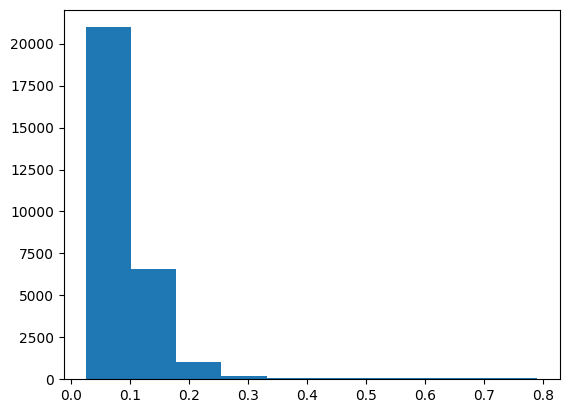

In [52]:
plt.hist(pred_dict['blbgra1'])

In [53]:
pred_pesudo = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv3.csv')

In [75]:
bird_cols = pred_pesudo.columns[:-2]
pred1_sum = (pred_pesudo[bird_cols]>0.7).sum()

In [85]:
LowClasses = ['1462737', '787625', '65547', '126247', '555142', '24272', '1564122', 'plctan1', '65336', '1346504', '548639', '476538', '963335', '66893', '714022', '46010', '134933', '1192948', '868458', '523060', '65419', '1194042', '1462711', '24292', '66531', '21116', '66578', '42113', '21038', '47067', '66016', '528041', '476537', '67082', '64862', '81930', '41778', '42087', '1139490']

In [83]:
pred_lowClasses = list(pred1_sum[pred1_sum==0].index)

In [91]:
print(list((set(LowClasses) & set(pred_lowClasses))))

['47067', '523060', '42113', '1192948', '1139490', '21038', '65419', 'plctan1', '963335', '81930', '126247', '1462737', '42087', '1462711', '66016', '528041', '1346504', '24292', '134933', '66531', '67082', '1564122', '66893', '46010', '24272', '66578', '476538', '1194042', '65336', '868458']


In [92]:
len(list((set(LowClasses) & set(pred_lowClasses))))

30

In [287]:
valid_res = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/logs/2025-03-28T10:17/valid.csv')

In [155]:
all_df = pd.read_csv('/root/projects/BirdClef2025/data/train.csv')
classes_cnt = all_df['primary_label'].value_counts()

In [123]:
classes_cnt[classes_cnt<5].shape

(23,)

In [131]:
LowClasses = ['47067', '523060', '42113', '1192948', '1139490', '21038', '65419', 'plctan1', '963335', '81930', '126247', '1462737', '42087', '1462711', '66016', '528041', '1346504', '24292', '134933', '66531', '67082', '1564122', '66893', '46010', '24272', '66578', '476538', '1194042', '65336', '868458']

In [290]:
last_res = valid_res.iloc[-1][:-1]
error_classes = list(last_res.sort_values()[:10].index)

In [292]:
last_res.sort_values()[:10].index

Index(['21038', '476537', '24292', '66016', '555142', '21116', '66531',
       '65419', '1139490', '66578'],
      dtype='object')

In [305]:
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv3.csv')

In [265]:
birds_cols = df.columns[1:-1]
pred_prob = df[bird_cols]
max_prob = pred_prob.max(axis=1)
exist_bird = df[max_prob>0.95]

In [349]:
soundscape_name = 'H09_20230512_064500'
max_index = df[df['filename']==soundscape_name][bird_cols].iloc[0].argmax()
print(df[df['filename']==soundscape_name][bird_cols].iloc[0].max())
bird_cols[max_index]

0.7212293744087219


'yectyr1'

In [236]:
# exist_bird[birds_cols] = 0
# exist_bird.to_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/soundscapes_nocall.csv',index=False)

/tmp/ipykernel_3241502/104903361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exist_bird[birds_cols] = 0


In [286]:
show_idx = 103
max_prob_class = birds_cols[exist_bird.iloc[show_idx][birds_cols].argmax()]
max_prob = exist_bird.iloc[show_idx][birds_cols].max()
filename = df.iloc[show_idx]['row_id']
print(f'max prob species:{max_prob_class}')
print(f'prob:{max_prob}')
print(f'filename:{filename}')
exist_bird.iloc[show_idx][birds_cols].sort_values(ascending=False)

max prob species:22976
prob:0.9751617908477784
filename:H90_20230515_215000_20


22976      0.975162
476538     0.042435
laufal1     0.01587
126247     0.014682
speowl1    0.004519
             ...   
blchaw1    0.000001
yehbla2    0.000001
1564122    0.000001
22333      0.000001
amakin1         0.0
Name: 10784, Length: 206, dtype: object

In [18]:
import torch
split2input2 = torch.linspace(torch.tensor(0.001),torch.tensor(0.999),steps=1000).reshape(-1,1,1)
split2targets = torch.tensor([1]).reshape(1,1)
res1 = []
res2 = []
for i in range(split2input2.shape[0]):
    this_input = split2input2[i,...]
    res1.append(-torch.mean(split2targets*torch.log(this_input)*((1-this_input)**2) + 
                            (1-split2targets)*torch.log(1-this_input)*(this_input**2),dim=(0,1)).item())
    
    res2.append(-torch.mean(split2targets*torch.log(this_input) + 
                            (1-split2targets)*torch.log(1-this_input),dim=(0,1)).item())

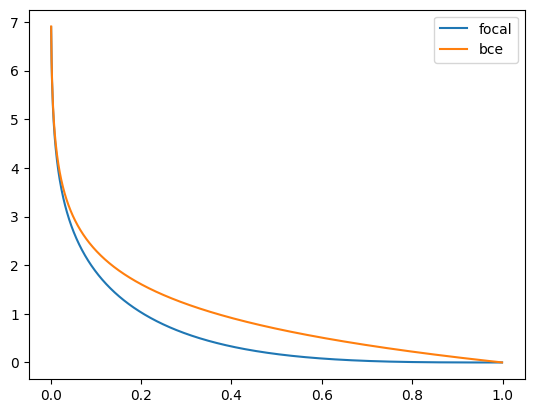

In [23]:
import matplotlib.pyplot as plt
plt.plot(split2input2.detach().cpu().numpy()[:,0,0],res1,label='focal')
plt.plot(split2input2.detach().cpu().numpy()[:,0,0],res2,label='bce')
plt.legend()

In [31]:
import pandas as pd
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/train.csv')
print(list(df['primary_label'].value_counts()[df['primary_label'].value_counts()<5].index))

['134933', '1192948', '868458', '523060', '65419', '1194042', '1462711', '24292', '66531', '21116', '66578', '42113', '21038', '47067', '66016', '528041', '476537', '67082', '64862', '81930', '41778', '42087', '1139490']


['https://static.inaturalist.org/sounds/1207345.wav', 'https://static.inaturalist.org/sounds/1208549.wav', 'https://static.inaturalist.org/sounds/1208550.wav', 'https://static.inaturalist.org/sounds/1208551.wav', 'https://static.inaturalist.org/sounds/1208552.wav', 'https://static.inaturalist.org/sounds/1208572.wav', 'https://xeno-canto.org/882655', 'https://static.inaturalist.org/sounds/630711.wav', 'https://static.inaturalist.org/sounds/630710.wav', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-34649/IAvH-CSA-34649.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-34651/IAvH-CSA-34651.mp3', 'https://xeno-canto.org/882878', 'https://xeno-canto.org/882879', 'https://xeno-canto.org/144437', 'https://xeno-canto.org/961783', 'https://static.inaturalist.org/sounds/246272.wav', 'https://static.inaturalist.org/sounds/565773.m4a', 'https://xeno-canto.org/959831', 'https://static.inaturalist.org/sounds/500217.wav', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CS

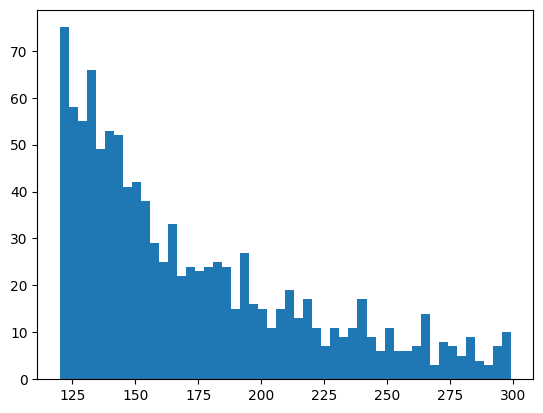

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf

df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/train_duration.csv')
df = df[df['duration']>120]
df = df[df['duration']<300]
plt.hist(df['duration'],bins=50)
print(list(df['url']))

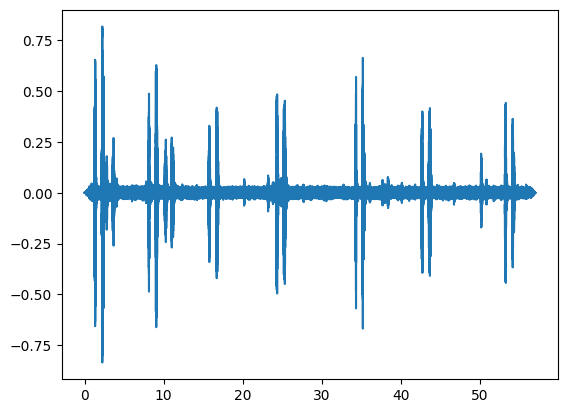

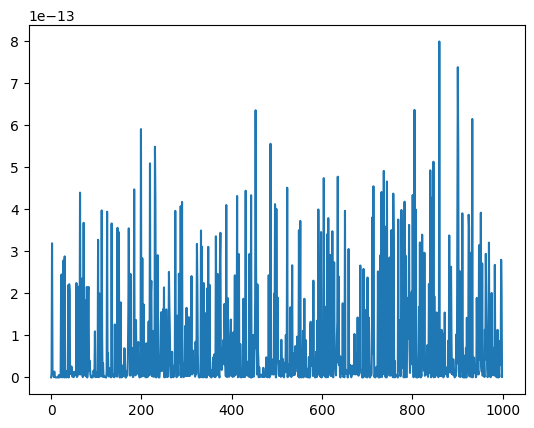

In [32]:
demodata = '/root/projects/BirdClef2025/data/train_audio/chbant1/XC818569.ogg'
wave,sr = sf.read(demodata)
plt.figure()
plt.plot(np.arange(0,len(wave)/sr,1/sr),wave)
total_power = np.sum(np.abs(wave)**2)
sample_prob = wave**2/total_power
plt.figure()
plt.plot(sample_prob[0:1000])

In [49]:
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv12_ensemble.csv')
# filter night time

time = df['path'].apply(lambda x: int(x.split('_')[-2][0:2]))
is_night = time.apply(lambda x: 1 if x>=20 or x<5 else 0)
df = df[is_night==0]

In [ ]:
import pandas as pd
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv11_ensemble.csv')
# filter night time

time = df['path'].apply(lambda x: int(x.split('_')[-2][0:2]))
is_night = time.apply(lambda x: 1 if x>=20 or x<5 else 0)
df = df[is_night==0]
bird_cols = df.columns[1:]
df['filename'] = df['path'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[:-1]))
# 对于同一组filename, 保留它们的argmax都一致的组
consistent = []
for idx,row in df.groupby('filename'):
    res = row[bird_cols].idxmax(axis=1)
    if len(res.unique())==1:
        consistent.append(idx)
df = df[df['filename'].isin(consistent)]
df = df.reset_index(drop=True)

df_modified = df.copy()
row_max_idx = df[bird_cols].idxmax(axis=1)  # 找到每一行最大值所在的列

for i, col in enumerate(row_max_idx):
    df_modified.at[i, col] = 1
df = df_modified
df = df.drop(columns=['filename'])
df.to_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv13_ensemble.csv',index=False)

In [21]:
import torch
pred = torch.softmax(torch.randn((4,50,16)),dim=-1)
label = torch.ones((4,50))
label[0,0] = 0
label[0,1] = 2
label[0,2] = 3
loss = torch.nn.CrossEntropyLoss()
out = loss(pred,label.long())

RuntimeError: Expected target size [4, 16], got [4, 50]

In [20]:
out

tensor(3.9129)